# **Errors**:

[See book: Métodos numéricos
usando Python ](https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y) pag. 32

The binary numbers not always can be stored in a finite way.
The amount of digits storage depend if we use **16, 32, 64 bits**.

To eliminated decimal digits we generate an error (error de redondeo).

*   **def. Error:** It is the diference between the obtained value an the correct value.

\begin{align}
E =& \text{valor} - \text{real}\\
E_\text{absoluto} =& |\text{valor} - \text{real}|\\
E_\text{realtivo} =& \dfrac{|\text{valor} - \text{real}|}{\text{real}}\\
E_\text{realtivo porcentual} =&\dfrac{|\text{valor} - \text{real}|}{\text{real}}\times 100
\end{align}

*   **def: Round error (error de redondeo)**: Those are generated when we eliminated digists of a quantity. Do not confused whith the round technique, which it is used to write a quantity with some digits. For example: $round(1,23452,2)=1,23$
*   **def: Truncation error (error de truncamiento):** Those are generated when we eliminated terms of an expression. For example, in the Taylor serie expansion with a finite numbers of terms.

In numerical methods it is inevitable to fall in this kind of errors. The goal is to reduce them in our computations.



**Erorr example 1**: In an experiment you measure $x=10.1$ and the exact value is $x=10.0$.

In [ ]:
valor = 10.1
valor_real =10.0

print('E=', round(valor- valor_real ,3) )
print('E_absoluto=', round(abs( valor- valor_real ) ,3) )
print('E_relativo=', round(abs( valor- valor_real )/valor_real ,3) )
print('E_relativo porcentual=', round((abs( valor- valor_real )/valor_real)*100 ,3) )

E= 0.1
E_absoluto= 0.1
E_relativo= 0.01
E_relativo porcentual= 1.0


# Round error

Example.

In [ ]:
number = 1.23552
print('number ->', number, '\n')

#Cut the number with two decimal digits.
print('cut x ->',int(number*100)/100)

#Round the number to two decimal digits.
print('round x ->',round(number,2))

number -> 1.23552 

cut x -> 1.23
round x -> 1.24


# Truncation error

**Taylor Serie** ( It is a MacLaurin serie when $x_0=0$ ).

\begin{equation}
f(x) = f(x_0) + f'(x_0)(x-x_0)+ \dfrac{f''(x_0)}{2!}(x-x_0)^2 + \cdots = \sum_{i=0}^{\infty} \dfrac{f^i(x_0)}{i!}(x-x_0)^i
\end{equation}

In [ ]:
import numpy as np
import sympy as sp #to do symbolic manipulation
import matplotlib.pyplot as plt

**Example 1:** Taylor serie for $\cos(x)$ truncated to order 8.

We know that:
\begin{equation}
\sin(x)=\lim_{N->\infty}\sum_{n=0}^N \dfrac{(-1)^n x^{2n+1}}{(2n+1)!}=\lim_{N->\infty} \left( x - \dfrac{x^3}{3!}+ \dfrac{x^5}{5!} ...\right)
\end{equation}
\begin{equation}
\cos(x)=\lim_{N->\infty}\sum_{n=0}^N \dfrac{(-1)^n x^{2n}}{(2n)!}=\lim_{N->\infty} \left(1-\dfrac{x^2}{2!}+ \dfrac{x^4}{4!} ...\right)
\end{equation}

However, the serie can be obtained using the library sympy of python

In [ ]:
x = sp.Symbol('x')

x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1


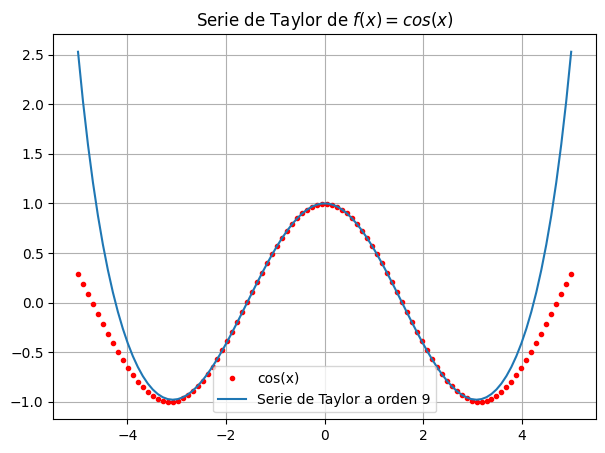

In [ ]:
plt.figure(figsize=(7,5))
x0 =0
n =9

#x is manage as  symbol
x = sp.Symbol('x')
t = sp.cos(x).series(x , x0 , n ).removeO() #cut the series to n terms
print( t )
#Convert a SymPy expression into a function that allows for fast numeric evaluation.
t = sp.lambdify(x ,t)

#Array
xx = np.linspace( x0 -5 , x0 +5 ,100)
yc = np.cos(xx)
yt = t(xx)
#Plot
plt.plot( xx , yc,'r.')#
plt.plot( xx , yt )
plt.legend([ 'cos(x)','Serie de Taylor a orden 9'])
plt.title('Serie de Taylor de $f(x)=cos(x)$')
plt.grid( True )

The beahavior around $x_0=0$ is good and in general for all the dominio. Hwever, here the periodicity of the funtion is no seen.

**Example 2:** Taylor serie for $\ln(x)$ truncated to order 5.

x - (x - 1)**4/4 + (x - 1)**3/3 - (x - 1)**2/2 - 1


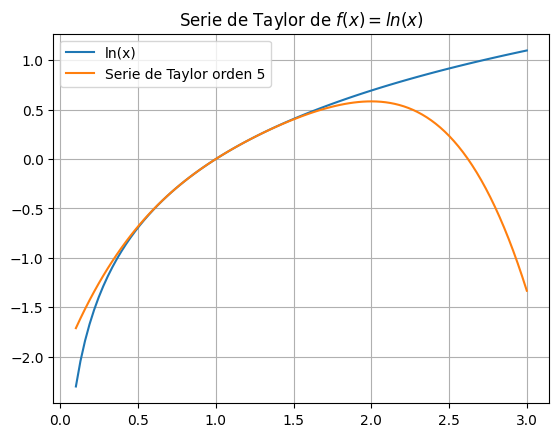

In [ ]:
x0 =1
n = 5

x = sp.Symbol('x')
t = sp.log(x).series(x , x0 , n ).removeO()
print( t )
#Convert a SymPy expression into a function that allows for fast numeric evaluation.
t = sp.lambdify(x ,t)

xx = np.linspace( x0-0.9 , x0+2 ,100)
yc = np.log(xx)
yt = t(xx)

plt.plot ( xx , yc , xx , yt )
plt.legend ([ 'ln(x)','Serie de Taylor orden 5'])
plt.title ('Serie de Taylor de $f(x)=ln(x)$')
plt.grid ( True )

We realice that the serie to order 5 match very well the funtion onli near to $x_0=1$.

**Example 3:** Taylor serie for $\exp(i\,x)=\cos(x)+i\sin(x)$ truncated to order 8. It is good to practice with the Imaginary numbers.

-0.000198412698412698*I*x**7 - 0.00138888888888889*x**6 + 0.00833333333333333*I*x**5 + 0.0416666666666667*x**4 - 0.166666666666667*I*x**3 - 0.5*x**2 + 1.0*I*x + 1


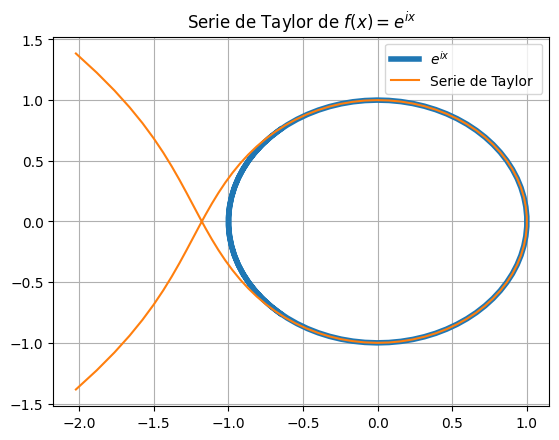

In [ ]:
x0 =0
n =8

x = sp.Symbol ('x')
t = sp.series( sp.exp(1j*x ) ,x , x0 , n ).removeO()
print (t)
t = sp.lambdify(x ,t )

yt = t( np . pi )

#print( yt )
xx = np.linspace ( x0 -4 , x0 +4 ,100)
yc = np.exp (1j * xx )
yt = t( xx )

plt.plot( yc.real , yc.imag, lw=4 )
plt.plot(yt.real , yt.imag )

plt.legend([ '$e ^{ ix}$','Serie de Taylor '])
plt.title('Serie de Taylor de $f(x)=e^{ ix}$')
plt.grid( True )

sustracción cancelativa?

 # Tarea 2.3: Error de truncamiento

* Escoja una función, hacerle la expansión de Taylor alrededor de un punto $x_0$ hasta un orden N.

* Dibujar la expansión para varios ordenes $N$ en conjunto con la función según numpy.

* ¿Qué puede decir respecto al error de truncamiento? -->


# Solución de la Tarea 2.3: Error de truncamiento

**Función elegida:** $f(x) = -\log_2(x)$

**Punto de expansión:** $x_0 = 0.5$

Primero, necesitamos cambiar de base para usar las funciones de Python:
$$\log_2(x) = \frac{\ln(x)}{\ln(2)}$$

Por lo tanto: $f(x) = -\frac{\ln(x)}{\ln(2)}$

In [8]:
# Expansión de Taylor para f(x) = -log_2(x)
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir la variable simbólica
x = sp.Symbol('x')

# Definir la función f(x) = -log_2(x) = -ln(x)/ln(2)
f = -sp.log(x)/sp.log(2)

print("Función original:", f)
print("Equivalentemente: f(x) = -log_2(x)")

# Punto de expansión (no podemos usar x_0 = 0 porque log no está definido ahí)
x0 = 0.5
print(f"Punto de expansión: x_0 = {x0}")

Función original: -log(x)/log(2)
Equivalentemente: f(x) = -log_2(x)
Punto de expansión: x_0 = 0.5


Polinomios P_n(x)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


 Polinomios R_n(x)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

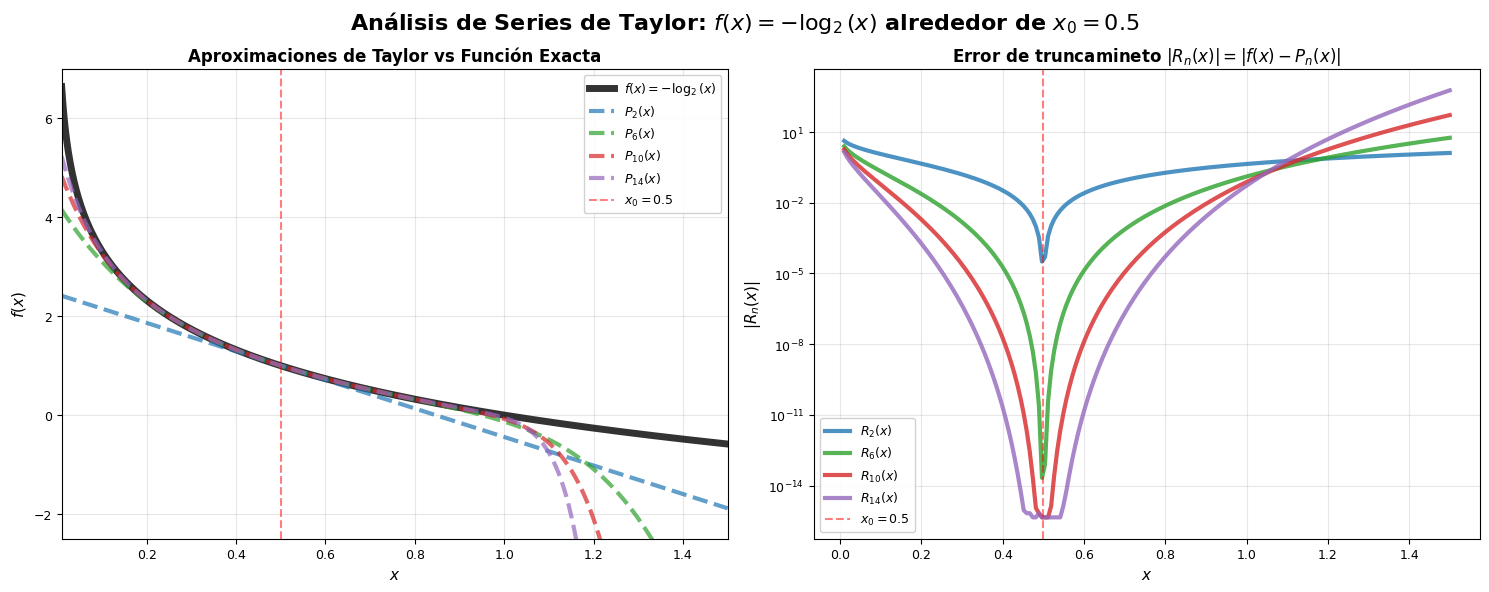

In [12]:
# Configurar estilo profesional
plt.style.use('default')
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 14
})
from IPython.display import display, Latex

# Crear figura con subplots organizados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis de Series de Taylor: $f(x) = -\log_2(x)$ alrededor de $x_0 = 0.5$', 
             fontsize=16, fontweight='bold')

# Definir el rango de x para graficar
xx = np.linspace(0.01, 1.5, 1000)
y_exact = -np.log2(xx)  # Función exacta

# Diferentes órdenes de expansión
orders = [2, 6, 10, 14]
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']
linestyles = ['--', '--', '--', '--', (0, (3, 1, 1, 1))]

# Subplot 1: Comparación de aproximaciones
ax1.plot(xx, y_exact, 'k-', linewidth=5, label='$f(x) = -\log_2(x)$', alpha=0.8)

print("Polinomios P_n(x)")

for i, n in enumerate(orders):
    # Calcular la serie de Taylor hasta orden n
    taylor_series = f.series(x, x0, n).removeO()
    
    # Mostrar en LaTeX
    taylor_latex = sp.latex(taylor_series)
    display(Latex(rf"$P_{{{n}}}(x) = {taylor_latex}$"))
    
    # Convertir a función numérica
    taylor_func = sp.lambdify(x, taylor_series, 'numpy')
    
    # Calcular valores
    try:
        y_taylor = taylor_func(xx)
        ax1.plot(xx, y_taylor, color=colors[i], linestyle=linestyles[i], 
                linewidth=3, label=f'$P_{{{n}}}(x)$', alpha=0.7)
    except:
        print(f"Error en la evaluación para orden {n}")

ax1.axvline(x=x0, color='red', linestyle='--', alpha=0.5, label=f'$x_0 = {x0}$')
ax1.set_xlim(0.01, 1.5)
ax1.set_ylim(-2.5, 7)
ax1.set_xlabel('$x$', fontweight='bold')
ax1.set_ylabel('$f(x)$', fontweight='bold')
ax1.set_title('Aproximaciones de Taylor vs Función Exacta', fontweight='bold')
ax1.legend(loc='best', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Subplot 2: Error residual R_n(x) = f(x) - P_n(x)
x_test = np.linspace(0.01, 1.5, 200)

print("\n Polinomios R_n(x)")

for i, n in enumerate(orders):
    taylor_series = f.series(x, x0, n).removeO()
    
    # Calcular R_n(x) = f(x) - P_n(x) simbólicamente
    R_n = f - taylor_series
    
    # Mostrar la expresión de R_n(x) en LaTeX
    R_n_simplified = sp.simplify(R_n)
    R_n_latex = sp.latex(R_n_simplified)
    display(Latex(rf"$R_{{{n}}}(x) = {R_n_latex}$"))
    
    # Convertir R_n(x) a función numérica
    R_n_func = sp.lambdify(x, R_n, 'numpy')
    
    try:
        # Evaluar |R_n(x)| en el rango
        R_n_values = R_n_func(x_test)
        error = np.abs(R_n_values)
        ax2.semilogy(x_test, error, color=colors[i], linewidth=3, 
                    label=f'$R_{{{n}}}(x)$', alpha=0.8)
        
    except Exception as e:
        print(f"Error en evaluación de R_{n}(x): {e}")

ax2.axvline(x=x0, color='red', linestyle='--', alpha=0.5, label=f'$x_0 = {x0}$')
ax2.set_xlabel('$x$', fontweight='bold')
ax2.set_ylabel('$|R_n(x)|$', fontweight='bold')
ax2.set_title('Error de truncamineto $|R_n(x)| = |f(x) - P_n(x)|$', fontweight='bold')
ax2.legend(loc='best', framealpha=0.9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Conclusiones sobre el Error de Truncamiento

### Observaciones del análisis:

1. **Comportamiento del error**:
   - El error es mínimo en $x_0 = 0.5$ y aumenta conforme nos alejamos del punto de expansión
   - Para órdenes más altos, el error disminuye significativamente en todo el dominio estudiado

2. **Error de truncamiento**:
   - **Definición**: Es el error introducido al truncar una serie infinita a un número finito de términos
   - **Comportamiento**: Disminuye al aumenta el orden de la expansión
   - **Factores**: Depende tanto del orden de truncamiento como de la distancia al punto de expansión.

3. **Análisis cuantitativo**:
   Notamos como efectivamente con el aumento del orden de la expansion el error disminuye en la region de interes.
